In [165]:
#Import our data first using Pandas and Pickle
import os
import pandas

plot_on = False
use_pipeline = True

def load_data():
    DATA_NAME = "appml-assignment1-dataset.pkl"
    REF_DIR = "ref\\in"
    data_path = os.path.join(".", REF_DIR, DATA_NAME)
    with open(data_path, "rb") as data_in:
        data = pandas.read_pickle(data_in)
    return [data['X'], data['y']]

#What does our data look like?
[data_features, data_labels] = load_data()
print("What's the size of our feature set?: "+str(data_features.shape))
print("And, of course, how many labels? "+str(data_labels.shape))
print("\nWhat's some of our stats?")
print(data_features.head())
data_features.info()
data_features.describe()

What's the size of our feature set?: (39640, 189)
And, of course, how many labels? (39640,)

What's some of our stats?
                     date  CAD-open  CAD-high   CAD-low  CAD-close  CHF-open  \
18412 2015-01-14 17:15:00  1.195500  1.196065  1.195430   1.195735  1.018795   
14220 2014-05-12 19:00:00  1.089745  1.089975  1.089720   1.089935  0.887755   
36252 2017-11-29 19:00:00  1.286515  1.287155  1.286305   1.286595  0.984525   
13653 2014-04-09 03:00:00  1.092575  1.093375  1.092380   1.092760  0.884270   
49163 2020-01-02 12:00:00  1.299845  1.300430  1.299275   1.299670  0.972185   

       CHF-high   CHF-low  CHF-close  CNH-open  ...  VGK-low  VGK-close  \
18412  1.018870  1.018360   1.018665  6.195550  ...    50.94      51.15   
14220  0.887810  0.887695   0.887785  6.243690  ...    60.68      60.77   
36252  0.984865  0.984180   0.984205  6.615300  ...    58.43      58.44   
13653  0.884315  0.882895   0.883050  6.198035  ...    58.91      58.97   
49163  0.973320  0.972180

,CAD-open,CAD-high,CAD-low,CAD-close,CHF-open,CHF-high,CHF-low,CHF-close,CNH-open,CNH-high,...,VGK-low,VGK-close,VIX-open,VIX-high,VIX-low,VIX-close,ZCN-open,ZCN-high,ZCN-low,ZCN-close
count,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,36254.000000,36254.000000,...,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000,39608.000000,39608.000000,39608.000000,39608.000000
mean,1.209977,1.210739,1.209219,1.209983,0.960916,0.961573,0.960231,0.960916,6.501766,6.503579,...,52.723365,52.794529,15.186952,15.325475,15.039155,15.178598,19.580117,19.593662,19.563919,19.578553
std,0.132527,0.132654,0.132395,0.132525,0.036159,0.036151,0.036195,0.036163,0.315308,0.315965,...,4.878581,4.870775,3.757955,3.859156,3.661835,3.764417,2.029194,2.029591,2.028042,2.028052
min,0.964425,0.965500,0.964150,0.965125,0.849125,0.855985,0.716080,0.839240,6.017270,6.018200,...,38.470000,38.490000,8.560000,9.050000,8.560000,8.960000,15.140000,15.140000,15.140000,15.140000
25%,1.072693,1.073121,1.072319,1.072730,0.933475,0.934274,0.932750,0.933525,6.209200,6.210156,...,49.000000,49.060000,12.660000,12.730000,12.580000,12.660000,17.870000,17.910000,17.860000,17.880000
50%,1.272825,1.273630,1.271975,1.272850,0.968163,0.968855,0.967440,0.968187,6.483350,6.485518,...,53.180000,53.250000,14.290000,14.400000,14.180000,14.290000,19.960000,19.970000,19.940000,19.960000
75%,1.318806,1.319645,1.318035,1.318840,0.990840,0.991405,0.990246,0.990835,6.793290,6.795948,...,56.600000,56.680000,16.860000,17.030000,16.710000,16.850000,21.070000,21.072500,21.050000,21.070000
max,1.468475,1.468990,1.463805,1.464735,1.033430,1.033525,1.030845,1.031710,7.194995,7.197400,...,63.370000,63.500000,49.210000,49.210000,49.210000,49.210000,23.810000,23.820000,23.810000,23.810000


In [166]:
#Plot some histograms of all the data (sorted by index/exchange)
%matplotlib inline
import matplotlib.pyplot as plt

if plot_on:
    figure = plt.figure()
    histogram = data_features.hist(bins=50, column=data_features.dtypes[1:].index, figsize=(20,200), layout=(47, 4))
    figure.tight_layout()

In [167]:
#Determine whether we should refer to correlation values to pick feature dimensions
correlation_matrix = data_features.corr()

if not use_pipeline:
    from pandas.plotting import scatter_matrix
    DELIMETER = "-"

    etf_titles = set([x.split(DELIMETER)[0] for x in data_features.dtypes[1:].index])
    etf_stat = set([x.split(DELIMETER)[1] for x in data_features.dtypes[1:].index])

    open_attributes = []
    high_attributes = []
    low_attributes = []
    close_attributes = []

    for stat in etf_stat:
        for etf in etf_titles:
            if stat == 'open':
                open_attributes.append(etf+DELIMETER+stat)
            elif stat == 'high':
                high_attributes.append(etf+DELIMETER+stat)
            elif stat == 'low':
                low_attributes.append(etf+DELIMETER+stat)
            elif stat == 'close':
                close_attributes.append(etf+DELIMETER+stat)
            else:
                pass

    #Is there a significant change in correlation across open-high-low-close?
    open_corr = data_features[open_attributes].corr()
    print("Opening Correlations\n", open_corr)
    high_corr = data_features[high_attributes].corr()
    print("High Correlations\n", high_corr)
    low_corr = data_features[low_attributes].corr()
    print("Low Correlations\n", low_corr)
    close_corr = data_features[close_attributes].corr()
    print("Closing Correlations\n", close_corr)
    #Nope, seems to work any way

In [168]:
# Custom Dimensionality Reduction! Use only the dimensions that are most correlated with CAD-high (our label minus 1 hour)
# Find the other exchanges that are most correlated with CAD (Canadian Exchange)

def find_top_n_correlations(match_string, correlation_matrix, num):
    search_dict = correlation_matrix[match_string]
    sorted_score_idxs = [scores for scores in reversed(sorted(range(len(search_dict)), key=lambda k:search_dict[k]))][0:]
    scores = []
    temp_scores = []
    etfs = []
    temp_etfs = []
    top_cursor = 0
    bottom_cursor = len(sorted_score_idxs)-1
    for i in range(num):
        if abs(search_dict[sorted_score_idxs[top_cursor]]) >= abs(search_dict[sorted_score_idxs[bottom_cursor]]):
            next_score = search_dict[sorted_score_idxs[top_cursor]]
            next_etf = search_dict.keys()[sorted_score_idxs[top_cursor]]
            top_cursor = top_cursor + 1
        else:
            next_score = search_dict[sorted_score_idxs[bottom_cursor]]
            next_etf = search_dict.keys()[sorted_score_idxs[bottom_cursor]]
            bottom_cursor = bottom_cursor - 1
        temp_scores.append(next_score)
        temp_etfs.append(next_etf)
        if len(temp_scores) >= num:
            break
    final_sort_idxs = [scores for scores in reversed(sorted(range(len(temp_scores)), key=lambda k:abs(temp_scores[k])))]
    for idx in final_sort_idxs:
        scores.append(temp_scores[idx])
        etfs.append(temp_etfs[idx])
    return [scores, etfs]

top_n = 10
# Seems that no matter the price, the correlation persists per country
[top_scores_open, top_etfs_open] = find_top_n_correlations('CAD-open', open_corr, top_n)
print("Top Correlations [OPEN]\n", top_scores_open, "\n", top_etfs_open)
[top_scores_high, top_etfs_high] = find_top_n_correlations('CAD-high', high_corr, top_n)
print("\nTop Correlations [HIGH]\n", top_scores_high, "\n", top_etfs_high)
[top_scores_low, top_etfs_low] = find_top_n_correlations('CAD-low', low_corr, top_n)
print("\nTop Correlations [LOW]\n", top_scores_low, "\n", top_etfs_low)
[top_scores_close, top_etfs_close] = find_top_n_correlations('CAD-close', close_corr, top_n)
print("\nTop Correlations [CLOSE]\n", top_scores_close, "\n", top_etfs_close)


Top Correlations [OPEN]
 [1.0, 0.9764581693077217, 0.9652744261813008, -0.9484540587013851, 0.9435168572435884, 0.9396322093696018, 0.9282553365771504, 0.9138462678923649, 0.8940608384715526, 0.8822549735404972] 
 ['CAD-open', 'NOK-open', 'RUB-open', 'USO-open', 'SGD-open', 'HUF-open', 'SEK-open', 'MXN-open', 'PLN-open', 'DKK-open']

Top Correlations [HIGH]
 [1.0, 0.9763745954822006, 0.9650226407862214, -0.9485102373869154, 0.943175582123054, 0.9392717325178364, 0.9280240672398671, 0.9135707762208816, 0.8934835122611565, 0.8819365819961433] 
 ['CAD-high', 'NOK-high', 'RUB-high', 'USO-high', 'SGD-high', 'HUF-high', 'SEK-high', 'MXN-high', 'PLN-high', 'DKK-high']

Top Correlations [LOW]
 [1.0, 0.9765448279004518, 0.9655713634561355, -0.9483474557017315, 0.9438575455597276, 0.9400310558319681, 0.928508496335927, 0.9141264806786807, 0.8946462370956519, 0.8826425327379885] 
 ['CAD-low', 'NOK-low', 'RUB-low', 'USO-low', 'SGD-low', 'HUF-low', 'SEK-low', 'MXN-low', 'PLN-low', 'DKK-low']

Top C

In [169]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class TopNTrimmer(BaseEstimator, TransformerMixin):
    def __init__(self, top_n):
        self.top_n = top_n
    def set_top_n(self, top_n):
        self.top_n = top_n
    def fit(self, X=None, y=None):
        return self
    def transform(self, X, y=None):
        #First get desired labels within data (dimension labels)
        from pandas.plotting import scatter_matrix
        DELIMETER = "-"
        etf_titles = set([x.split(DELIMETER)[0] for x in X.dtypes[1:].index])
        etf_stat = set([x.split(DELIMETER)[1] for x in X.dtypes[1:].index])

        open_attributes = []
        high_attributes = []
        low_attributes = []
        close_attributes = []

        for stat in etf_stat:
            for etf in etf_titles:
                if stat == 'open':
                    open_attributes.append(etf+DELIMETER+stat)
                elif stat == 'high':
                    high_attributes.append(etf+DELIMETER+stat)
                elif stat == 'low':
                    low_attributes.append(etf+DELIMETER+stat)
                elif stat == 'close':
                    close_attributes.append(etf+DELIMETER+stat)
                else:
                    pass
        #Determine correlations
        open_corr = data_features[open_attributes].corr()
        high_corr = data_features[high_attributes].corr()
        low_corr = data_features[low_attributes].corr()
        close_corr = data_features[close_attributes].corr()
        #Get the top correlators for open, high, low, and close
        [top_scores_open, top_etfs_open] = find_top_n_correlations('CAD-open', open_corr, self.top_n)
        [top_scores_high, top_etfs_high] = find_top_n_correlations('CAD-high', high_corr, self.top_n)
        [top_scores_low, top_etfs_low] = find_top_n_correlations('CAD-low', low_corr, self.top_n)
        [top_scores_close, top_etfs_close] = find_top_n_correlations('CAD-close', close_corr, self.top_n)
        #Trim accordingly
        data_features_trimmed = data_features[\
            top_etfs_close[0:self.top_n]+\
            top_etfs_high[0:self.top_n]+\
            top_etfs_low[0:self.top_n]+\
            top_etfs_open[0:self.top_n]]
        return data_features_trimmed

In [170]:
#Let's look at the scatter of the top X for the open

plot_top_n = 1

if plot_on:
    scatter_matrix(data_features[['CAD-open']+top_etfs_open[0:plot_top_n]], figsize=(15, 11))
#Let's look at the scatter of the top X for the high
if plot_on:
    scatter_matrix(data_features[['CAD-high']+top_etfs_high[0:plot_top_n]], figsize=(15, 11))
#Let's look at the scatter of the top X for the low
if plot_on:
    scatter_matrix(data_features[['CAD-low']+top_etfs_low[0:plot_top_n]], figsize=(15, 11))
#Let's look at the scatter of the top X for the close
if plot_on:
    scatter_matrix(data_features[['CAD-close']+top_etfs_close[0:plot_top_n]], figsize=(15, 11))

In [171]:
if not use_pipeline:
    ## Which set of dimensions gives us the best error output? (Do we feature select?)

    #The top N plus CAD
    # data_features_trimmed = data_features[['CAD-close']+['CAD-high']+['CAD-low']+['CAD-open']+\
    #     top_etfs_close[0:plot_top_n]+top_etfs_high[0:plot_top_n]+top_etfs_low[0:plot_top_n]+top_etfs_open[0:plot_top_n]]

    #Just CAD
    # data_features_trimmed = data_features[['CAD-close']+['CAD-high']+['CAD-low']+['CAD-open']]

    #Just top N
    top_n_trimmer = TopNTrimmer(1)
    data_features_trimmed = top_n_trimmer.transform(data_features)
    # data_features_trimmed = data_features[\
    #     top_etfs_close[0:plot_top_n]+top_etfs_high[0:plot_top_n]+top_etfs_low[0:plot_top_n]+top_etfs_open[0:plot_top_n]]

    #CAD plus low correlated VIX
    # data_features_trimmed = data_features[['CAD-close']+['CAD-high']+['CAD-low']+['CAD-open']+\
    #     ['VIX-close']+['VIX-high']+['VIX-low']+['VIX-open']]

    #Just low correlated VIX
    # data_features_trimmed = data_features[\
    #     ['VIX-close']+['VIX-high']+['VIX-low']+['VIX-open']]

    #Everything
    # data_features_trimmed = data_features[open_attributes+high_attributes+low_attributes+close_attributes]

    #Drop anything that has NaN data, we don't want em (or if using pipeline, replace with mean)
    data_features_trimmed = data_features_trimmed.dropna()
    data_labels_trimmed = data_labels[[x+1 for x in list(data_features_trimmed.index)]]
    data_features_trimmed

In [172]:
if not use_pipeline:
    #Let's preprocess our data with a Standard Scaler
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(data_features_trimmed)
    data_features_trimmed_scale = scaler.transform(data_features_trimmed)


    from sklearn.preprocessing import PolynomialFeatures
    #Should we add some more degrees (degree=2), or keep it strictly linear (degree=1)?
    poly_features = PolynomialFeatures(degree=1, include_bias=False)
    # poly_features = PolynomialFeatures(degree=2, include_bias=False)
    data_features_trimmed_scale_trans = poly_features.fit_transform(data_features_trimmed_scale)
    data_final = data_features_trimmed_scale_trans
    data_labels_final = data_labels_trimmed

Reached minimum: Train Length = 456
Lowest Validation MSE: 6.782194288783208e-07


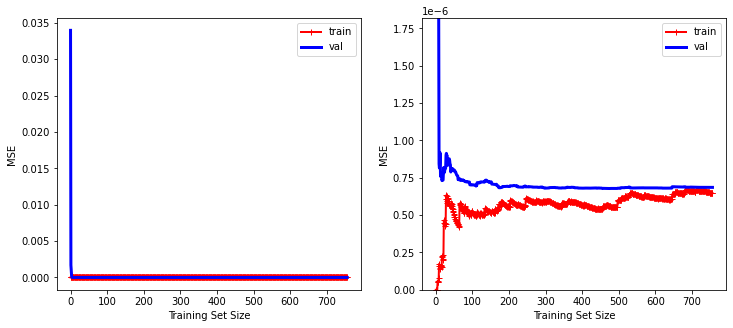

In [208]:
#Playing around with a few models (utilizing early stopping)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.base import clone
import numpy as np
from sklearn.pipeline import Pipeline

#Test the pipeline
if use_pipeline:
    

    my_pipeline = Pipeline([
            ("top_n_trimmer", TopNTrimmer(1)),
            ("imputer", SimpleImputer(strategy="mean")), 
            # ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
            ("scaler", StandardScaler()),
        ])
    my_pipeline.fit(data_features)
    data_final = my_pipeline.transform(data_features)

    

def calc_learning_curves(model, X, y, max_wait=300):
    minimum_val_error = float("inf")
    best_train_length = None
    best_model = None
    since_last_decrease = 0
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=613)
    train_errors, val_errors = [], []
    # print(len(X_train))
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error = mean_squared_error(y_train[:m], y_train_predict)
        val_error = mean_squared_error(y_val, y_val_predict)
        if val_error < minimum_val_error:
            since_last_decrease = 0
            minimum_val_error = val_error
            best_train_length = m
            best_model = clone(model)
            best_model.fit(X_train[:m], y_train[:m])
        else:
            since_last_decrease = since_last_decrease + 1
        train_errors.append(train_error)
        val_errors.append(val_error)
        if since_last_decrease > max_wait:
            print("Reached minimum: Train Length = "+str(best_train_length))
            print("Lowest Validation MSE: "+str(min(val_errors)))
            break
    return train_errors, val_errors, best_model, best_train_length
    
# best_model.fit(X_train_poly_scaled, y_train)

lin_reg = LinearRegression(n_jobs=4)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
svm_reg = LinearSVR(epsilon=0)

#Pick a model
model = lin_reg #Appears to be the most consistent model
# model = sgd_reg #Way too jumpty
# model = svm_reg #Takes way too long
try:
    train, validate, final_model, m = calc_learning_curves(lin_reg, data_final, data_labels_final)
except np.linalg.LinAlgError:
    train, validate, final_model, m = calc_learning_curves(lin_reg, data_final, data_labels_final)
# train, validate, final_model, m = calc_learning_curves(my_pipeline_with_linear, data_final, data_labels_final)

#Plot some "learning" curves
fig = plt.figure(1, figsize=(12, 5))

fig.add_subplot(121)
plt.plot(train, "r-+", linewidth=2, label="train")
plt.plot(validate, "b-", linewidth=3, label="val")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()

fig.add_subplot(122)
plt.plot(train, "r-+", linewidth=2, label="train")
plt.plot(validate, "b-", linewidth=3, label="val")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.ylim([0, min(validate) +(sum(train)/len(train))*2])
plt.legend()

In [103]:
print(final_model.predict(data_features_trimmed_scale_trans[:3]))
print(data_labels_trimmed[:3])
print(mean_squared_error(data_labels_trimmed[:3], final_model.predict(data_features_trimmed_scale_trans[:3])))

[1.19618274 1.09025061 1.28712964]
18413    1.195960
14221    1.090230
36253    1.286935
Name: CAD-high, dtype: float64
2.9307512916493705e-08
